<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF-285 - Computación Científica </h1>
    <h2> Class zero - linear transformation of an image </h2>
    <h2> <a href="#acknowledgements"> [S]cientific [C]omputing [T]eam </a> </h2>
    <h2> Version: 1.00 </h2>
</center>


# Importing libraries

In [11]:
import numpy as np
from matplotlib import image
import matplotlib.pyplot as plt
from ipywidgets import interact, interact_manual

# Loading an image

In [12]:
# Loading example image
MyImage = image.imread('./images/1900s-casa-de-don-federico-en-paris.jpg')
# n: Number of rows
# m: Number of columns
n, m = MyImage.shape
print('Size of original image\t:',n,m)

# Re-sampling the image to we deal with a lower number of pixels
MyImage=MyImage[0:-1:6,0:-1:6]
n, m = MyImage.shape
print('Size of reduced image\t:', n,m)

Size of original image	: 1718 1082
Size of reduced image	: 287 181


# Showing the image. What does it show the image?

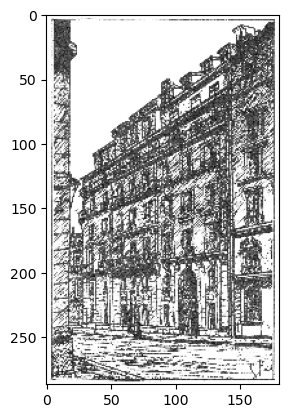

In [13]:
plt.imshow(MyImage, cmap='gray', vmin=0, vmax=255)
plt.show()

# Before we transform the image

Now, before we transform the image, we will transform a funtion in two-variable.
The function is:
$$
    \begin{align*}
        f(x,y) &= \dfrac{x^2}{0.9^2}+\dfrac{(y-1)^2}{0.5^2}-2.
    \end{align*}
$$
The transformation we will use is the following:
$$
    \begin{align*}
        \widetilde{x} &= a_{1,1}\,x+a_{1,2}\,y,\\
        \widetilde{y} &= a_{2,1}\,x+a_{2,2}\,y,\\ 
    \end{align*}
$$
or in a matrix-vector product form:
$$
    \begin{align*}
        \begin{bmatrix}
            \widetilde{x}\\
            \widetilde{y}
        \end{bmatrix}
        &=
        \begin{bmatrix}
            a_{1,1} & a_{1,2}\\
            a_{2,1} & a_{2,2}
        \end{bmatrix}
        \begin{bmatrix}
            x\\
            y
        \end{bmatrix}\\
        &= A \,
        \begin{bmatrix}
            x\\
            y
        \end{bmatrix} 
    \end{align*}.
$$
This implies that $f(x,y)=f(X,Y)$.
So, **how do we use this?**
The idea is analyze the function $f(\cdot,\cdot)$ in the two system of reference, i.e. $x-y$ or $X-Y$.
Each of them has its own advantages and disadvantages.

Here, the point is to represent use the linear-transformation and understand how to represent it graphically, to then connect it with the idea of transform images.


# Plotting the function $f(x,y)$ as contour plots

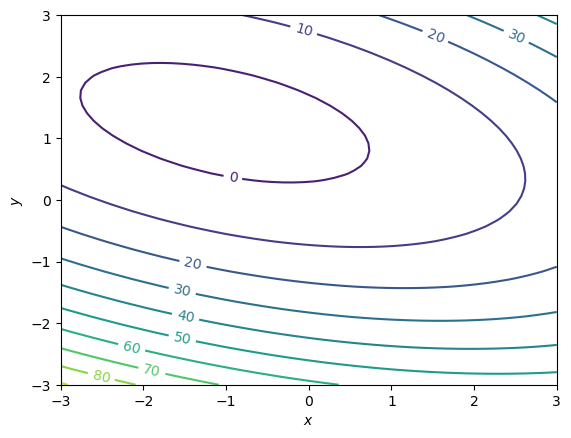

In [14]:
f = lambda x,y: np.power(x,2)/np.power(0.9,2)+np.power(y-1,2)/np.power(0.5,2)+2*x*y-2

N = 50
x = np.linspace(-3.0, 3.0, N)
y = np.linspace(-3.0, 3.0, N)
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, f(X,Y), 10)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
plt.show()


# Here we use _scatter_ plot to show the same as before

<Figure size 640x480 with 0 Axes>

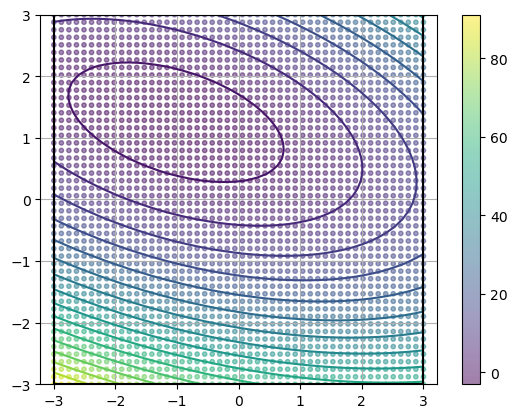

In [15]:
x_flatten = X.flatten()
y_flatten = Y.flatten()
z_flatten = f(X,Y).flatten()
plt.figure()
fig, ax = plt.subplots()
CS = ax.contour(X, Y, f(X,Y), 15)
plt.scatter(x_flatten, y_flatten, s=10, c=z_flatten, alpha=0.5)
plt.hlines(-3,-3,3, colors='k')
plt.hlines(3,-3,3, colors='k')
plt.vlines(-3,-3,3, colors='k')
plt.vlines(3,-3,3, colors='k')
plt.axis('equal')
plt.grid(True)
plt.colorbar()
plt.show()

# Finally, we transform the function, or equivalenty, we plot it using $\widetilde{x}$ and $\widetilde{y}$ coordinate system

In [16]:
xy_data = np.zeros((2,N**2))
xy_data[0,:] = x_flatten
xy_data[1,:] = y_flatten

def transform_function(a11=1.0,a12=0.0,a21=0.0,a22=1.0,flagFull=False):
    
    A = np.array([[a11,a12],[a21,a22]])
    xy_transformed = np.dot(A,xy_data)

    plt.figure()
    plt.scatter(xy_transformed[0,:], xy_transformed[1,:], s=10, c=z_flatten, alpha=0.5)
    plt.colorbar()
    plt.hlines(-3,-3,3, colors='k')
    plt.hlines(3,-3,3, colors='k')
    plt.vlines(-3,-3,3, colors='k')
    plt.vlines(3,-3,3, colors='k')
    
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    if flagFull:
        plt.axis('equal')
    plt.grid(True)
    plt.show()

interact(transform_function, a11=(-3,3,0.1),a12=(-3,3,0.1),a21=(-3,3,0.1),a22=(-3,3,0.1))

interactive(children=(FloatSlider(value=1.0, description='a11', max=3.0, min=-3.0), FloatSlider(value=0.0, des…

<function __main__.transform_function(a11=1.0, a12=0.0, a21=0.0, a22=1.0, flagFull=False)>

# Now, we come back to the original image but now we know how to _transform_ it

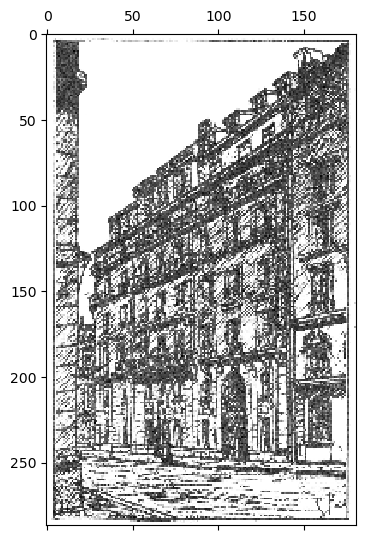

In [17]:
plt.matshow(MyImage, cmap='gray')
plt.show()

The only issue we need to solve is that we need to define what would be *$x$* and *$y$* now.
The answer is in the previous image!
We could simple use the id of the pixels shown before, i.e. $x\in\{1,2,3,\dots,181\}$ and $y\in\{1,2,3,\dots,287\}$.
We now have everything to transform the image.

**The only isse is that we will see the image upsidedown, why?**

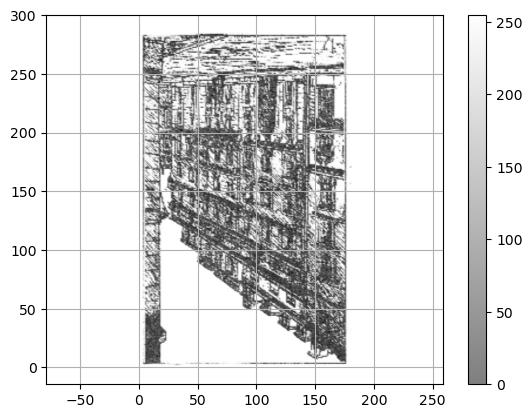

In [18]:
x = np.arange(m)
y = np.arange(n)
X, Y = np.meshgrid(x, y)

x_flatten = X.flatten()
y_flatten = Y.flatten()
z_flatten = MyImage.flatten()

plt.figure()
plt.scatter(x_flatten, y_flatten, s=1, c=z_flatten, alpha=0.5, cmap='gray')
plt.axis('equal')
plt.grid(True)
plt.colorbar()
plt.show()


In [19]:
xy_data = np.zeros((2,n*m))
xy_data[0,:] = x_flatten
xy_data[1,:] = y_flatten

def transform_image(a11=1.0,a12=0.0,a21=0.0,a22=1.0,fullFlag=False):
    
    A = np.array([[a11,a12],[a21,a22]])
    
    xy_transformed = np.dot(A,xy_data)

    plt.figure()
    plt.scatter(xy_transformed[0,:], xy_transformed[1,:], s=1, c=z_flatten, alpha=0.5, cmap='gray')
    plt.colorbar()
    plt.grid(True)
    plt.xlim(-1.5*n,1.5*n)
    plt.ylim(-1.5*n,1.5*n)
    if fullFlag:
        plt.axis('equal')
    plt.show()

Now, select the correct coefficients of the matrix $A$ such that the image looks right. And also play with the coefficients!

In [20]:
interact(transform_image,a11=(-3,3,0.1),a12=(-3,3,0.1),a21=(-3,3,0.1),a22=(-3,3,0.1))

interactive(children=(FloatSlider(value=1.0, description='a11', max=3.0, min=-3.0), FloatSlider(value=0.0, des…

<function __main__.transform_image(a11=1.0, a12=0.0, a21=0.0, a22=1.0, fullFlag=False)>

<div id='acknowledgements' />

# Acknowledgements
[Back to TOC](#toc)

* _Material originally created by professor Claudio Torres_ (`ctorres@inf.utfsm.cl`). v.1.0. DI UTFSM. August 2024._